In [4]:
import numpy as np
import pandas as pd

# Visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# ignore alert
import warnings
warnings.filterwarnings('ignore')

# Load path
df = pd.read_csv('./machine.data', header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [6]:
# Columns name changed
df.columns = ['Vendor name', 'Model Name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']

df

,Vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [12]:
#raw, column length
print(df.shape, '\n')

print(df.describe(), '\n\n')

print(df.info())

(209, 10) 

              MYCT          MMIN          MMAX        CACH       CHMIN  \
count   209.000000    209.000000    209.000000  209.000000  209.000000   
mean    203.822967   2867.980861  11796.153110   25.205742    4.698565   
std     260.262926   3878.742758  11726.564377   40.628722    6.816274   
min      17.000000     64.000000     64.000000    0.000000    0.000000   
25%      50.000000    768.000000   4000.000000    0.000000    1.000000   
50%     110.000000   2000.000000   8000.000000    8.000000    2.000000   
75%     225.000000   4000.000000  16000.000000   32.000000    6.000000   
max    1500.000000  32000.000000  64000.000000  256.000000   52.000000   

            CHMAX          PRP          ERP  
count  209.000000   209.000000   209.000000  
mean    18.267943   105.622010    99.330144  
std     25.997318   160.830733   154.757102  
min      0.000000     6.000000    15.000000  
25%      5.000000    27.000000    28.000000  
50%      8.000000    50.000000    45.000000  

In [21]:
# List comprehension
categorical = [col for col in df.columns if df[col].dtype == 'object']
df[categorical]


,Vendor name,Model Name
0,adviser,32/60
1,amdahl,470v/7
2,amdahl,470v/7a
3,amdahl,470v/7b
4,amdahl,470v/7c
...,...,...
204,sperry,80/8
205,sperry,90/80-model-3
206,sratus,32
207,wang,vs-100


In [25]:
# 중복 없이 종류를 인쇄
df[categorical[0]].unique()

array(['adviser', 'amdahl', 'apollo', 'basf', 'bti', 'burroughs', 'c.r.d',
       'cdc', 'cambex', 'dec', 'dg', 'formation', 'four-phase', 'gould',
       'hp', 'harris', 'honeywell', 'ibm', 'ipl', 'magnuson', 'microdata',
       'nas', 'ncr', 'nixdorf', 'perkin-elmer', 'prime', 'siemens',
       'sperry', 'sratus', 'wang'], dtype=object)

In [26]:
# 각각의 값이 몇 개씩 있는 지 확인
df[categorical[0]].value_counts()

Vendor name
ibm             32
nas             19
ncr             13
sperry          13
honeywell       13
siemens         12
cdc              9
amdahl           9
burroughs        8
hp               7
harris           7
dg               7
dec              6
c.r.d            6
ipl              6
magnuson         6
cambex           5
prime            5
formation        5
perkin-elmer     3
gould            3
nixdorf          3
wang             2
bti              2
basf             2
apollo           2
microdata        1
four-phase       1
sratus           1
adviser          1
Name: count, dtype: int64

In [27]:
# 각 행마다 모두 다름, 인코딩 의미 X
df[categorical[1]].unique()


array(['32/60', '470v/7', '470v/7a', '470v/7b', '470v/7c', '470v/b',
       '580-5840', '580-5850', '580-5860', '580-5880', 'dn320', 'dn420',
       '7/65', '7/68', '5000', '8000', 'b1955', 'b2900', 'b2925', 'b4955',
       'b5900', 'b5920', 'b6900', 'b6925', '68/10-80', 'universe:2203t',
       'universe:68', 'universe:68/05', 'universe:68/137',
       'universe:68/37', 'cyber:170/750', 'cyber:170/760',
       'cyber:170/815', 'cyber:170/825', 'cyber:170/835', 'cyber:170/845',
       'omega:480-i', 'omega:480-ii', 'omega:480-iii', '1636-1',
       '1636-10', '1641-1', '1641-11', '1651-1', 'decsys:10:1091',
       'decsys:20:2060', 'microvax-1', 'vax:11/730', 'vax:11/750',
       'vax:11/780', 'eclipse:c/350', 'eclipse:m/600', 'eclipse:mv/10000',
       'eclipse:mv/4000', 'eclipse:mv/6000', 'eclipse:mv/8000',
       'eclipse:mv/8000-ii', 'f4000/100', 'f4000/200', 'f4000/200ap',
       'f4000/300', 'f4000/300ap', '2000/260', 'concept:32/8705',
       'concept:32/8750', 'concept:32/8780'

In [61]:
df.columns

Index(['Vendor name', 'Model Name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
       'CHMAX', 'PRP', 'ERP'],
      dtype='object')

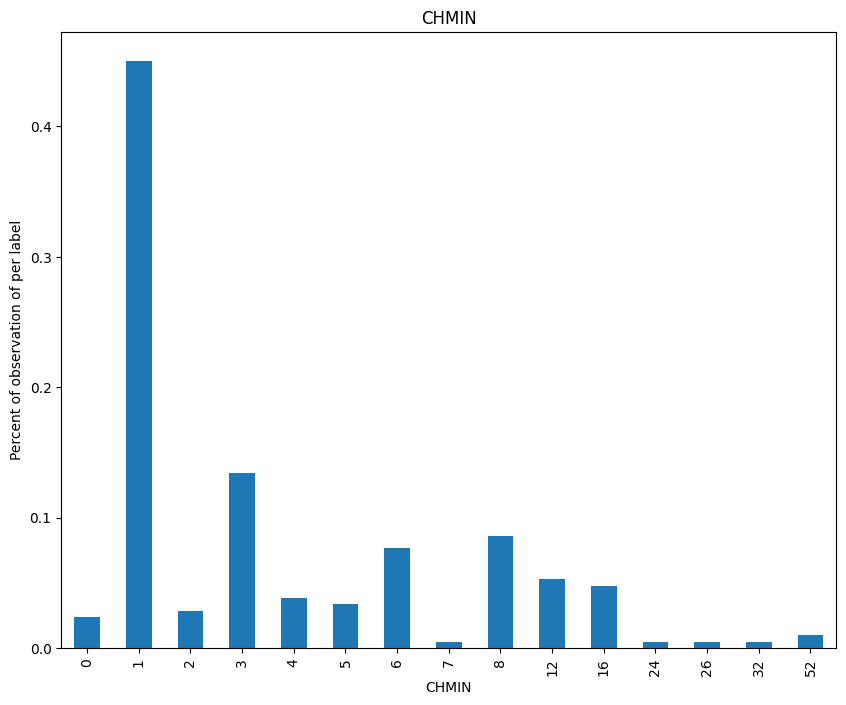

In [62]:
# 1. 도화지 준비하기
plt.figure(figsize = (10,8))

# 데이터를 시각화 하는 줄, 중요!!
(df.groupby('CHMIN')['CHMIN'].count() / (len(df))).plot.bar()

# 1. df에서 chmin 열의 값을 기준으로 그룹화, 
# 2. chmin 값들의 개수 / 전체 행 수
plt.ylabel('Percent of observation of per label')
plt.title("CHMIN")
plt.show()

<Axes: xlabel='CHMIN'>

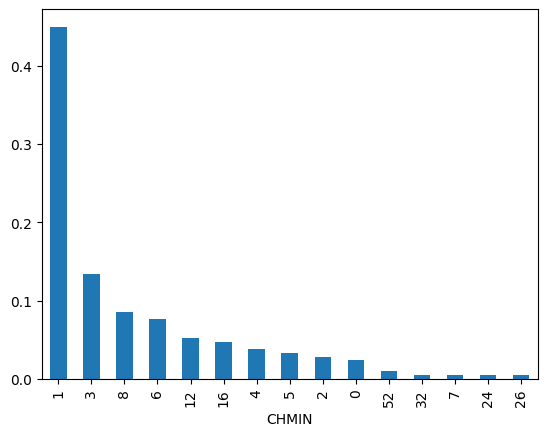

In [64]:
(df['CHMIN'].value_counts(normalize=True)).plot.bar()


In [65]:
X = df.iloc[:, 2:-1]
X

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132
...,...,...,...,...,...,...,...
204,124,1000,8000,0,1,8,42
205,98,1000,8000,32,2,8,46
206,125,2000,8000,0,2,14,52
207,480,512,8000,32,0,0,67


In [66]:
Y = df.iloc[:,-1]
Y
type(Y)

pandas.core.series.Series

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)


# 스케일 변환

from sklearn.preprocessing import StandardScaler    
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train

array([[-0.62462782, -0.23408736, -0.65324839, ..., -0.24079651,
        -0.48522241, -0.50149362],
       [-0.62462782, -0.51943581, -0.32125604, ..., -0.24079651,
        -0.52410412, -0.4448963 ],
       [-0.62462782, -0.23408736,  0.34272867, ..., -0.24079651,
        -0.09640533, -0.38829897],
       ...,
       [ 0.83470291,  0.33660954, -0.32125604, ..., -0.56783177,
        -0.67963095, -0.47005066],
       [-0.72469622,  3.76079095,  1.67069808, ...,  1.88493266,
         0.21464833,  2.25290935],
       [-0.16598102, -0.65868585, -0.81924457, ..., -0.24079651,
        -0.40745899, -0.47005066]])

In [76]:
# modeling
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)


LinearRegression()

In [77]:
y_predict = lr.predict(X_test)
print("기울기: {}".format(lr.coef_))
print("절편: {}".format(lr.intercept_))

기울기: [ 7.51473271 15.60516456 47.48823917  7.73871929 -3.91711219 10.63117088
 83.19660182]
절편: 100.38356164383562


In [78]:
from sklearn.metrics import r2_score
print("R2 score: {}".format(r2_score(Y_test, y_predict)))
#R2 socre = 회귀선이 데이터의 분포를 얼마나 잘 나타내는가를 계산하는 함수
# 0.7 이상이면 분포를잘 표현함

R2 score: 0.93830634936181
